In [15]:
import function as f
import pandas as pd
import matplotlib.pyplot as plt

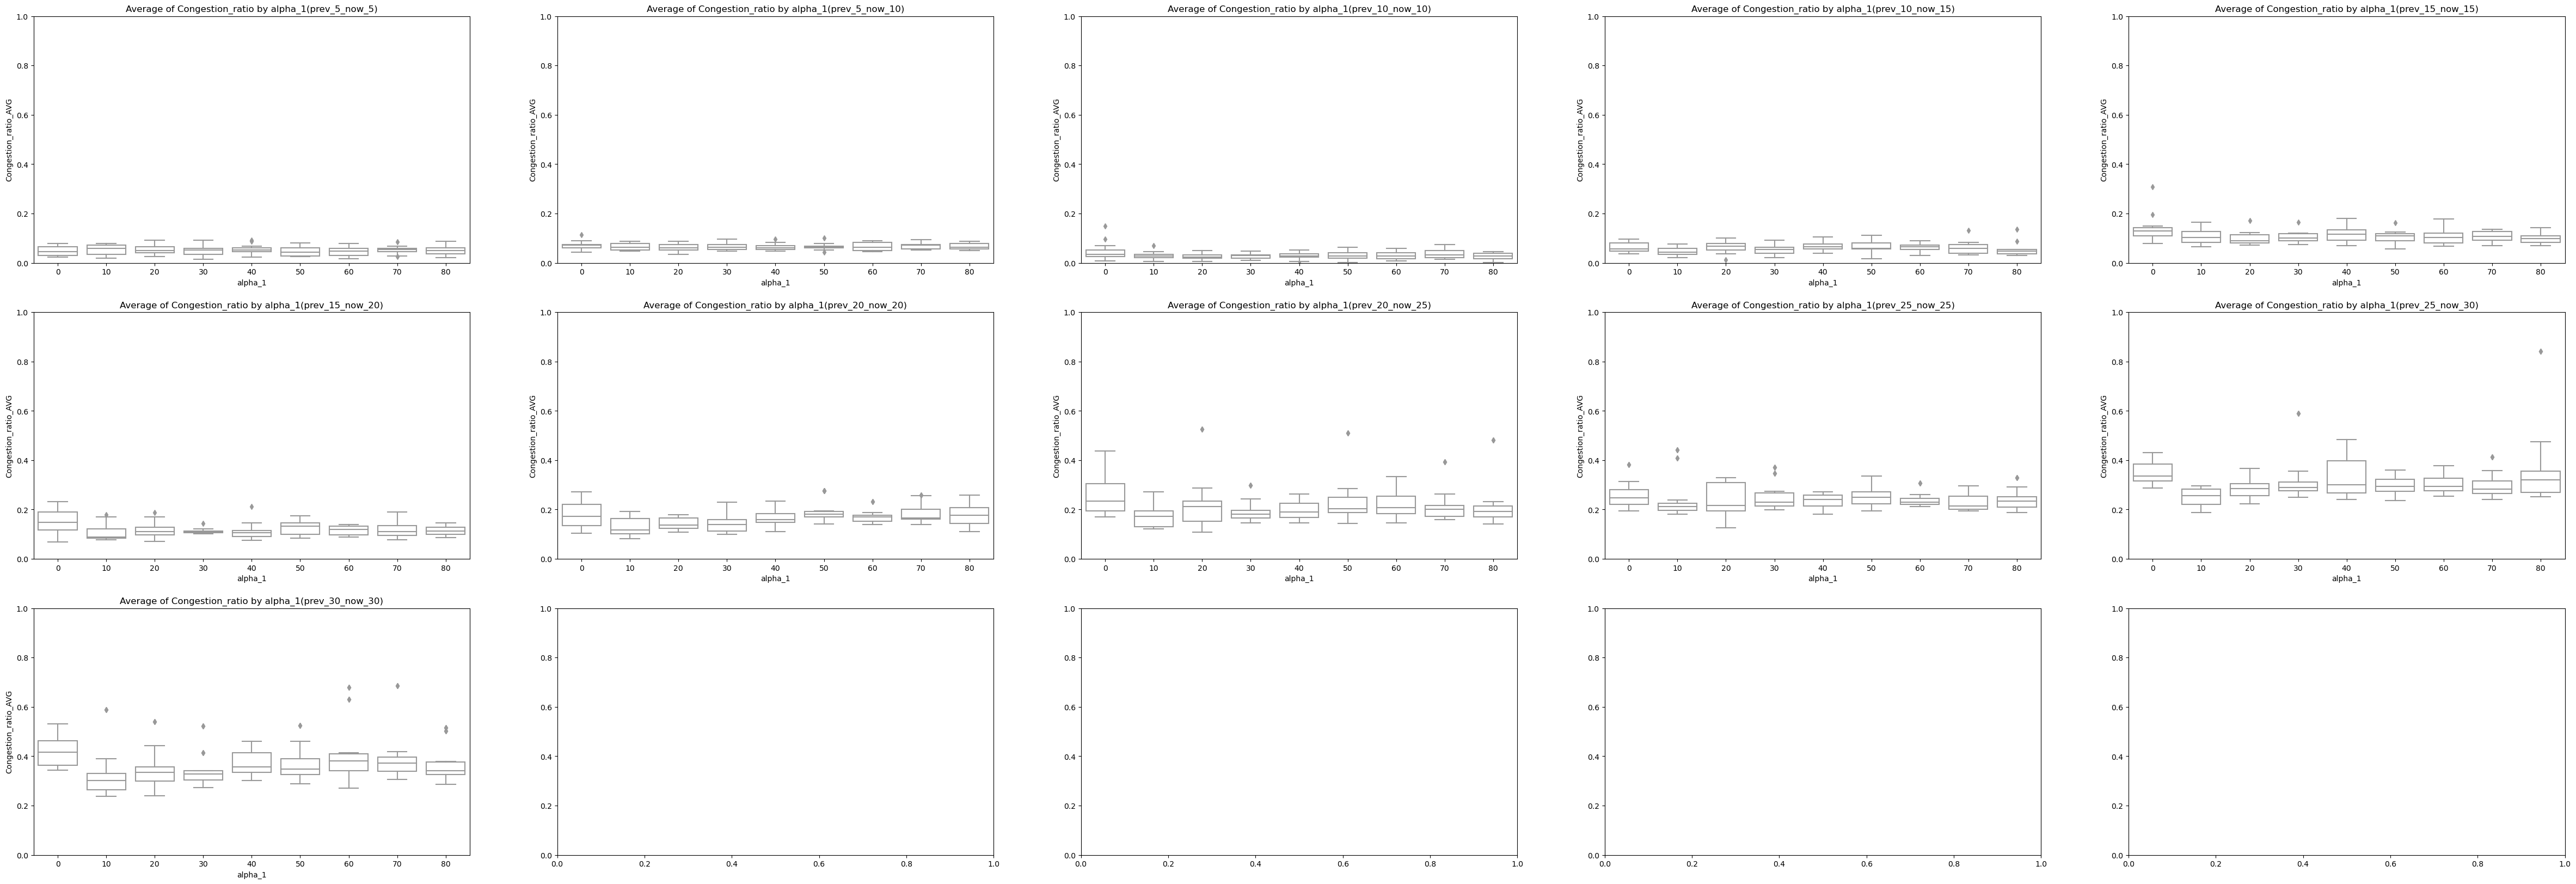

In [16]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = ['Congestion_ratio_AVG']

title = 'Average of Congestion_ratio by alpha_1'
col_num = 5
y_lim = (0, 1)
# fig_size = (36, 12)
fig_size = (60, 20)

dfs = f.get_dfs_by_folder(folder_path, y_col, False)
dfs = f.to_numeric(dfs, y_col[0])

f.boxsubplot(dfs, x_col, y_col[0], col_num, y_lim, title, fig_size)

Remove outliers by  Congestion_ratio_AVG !


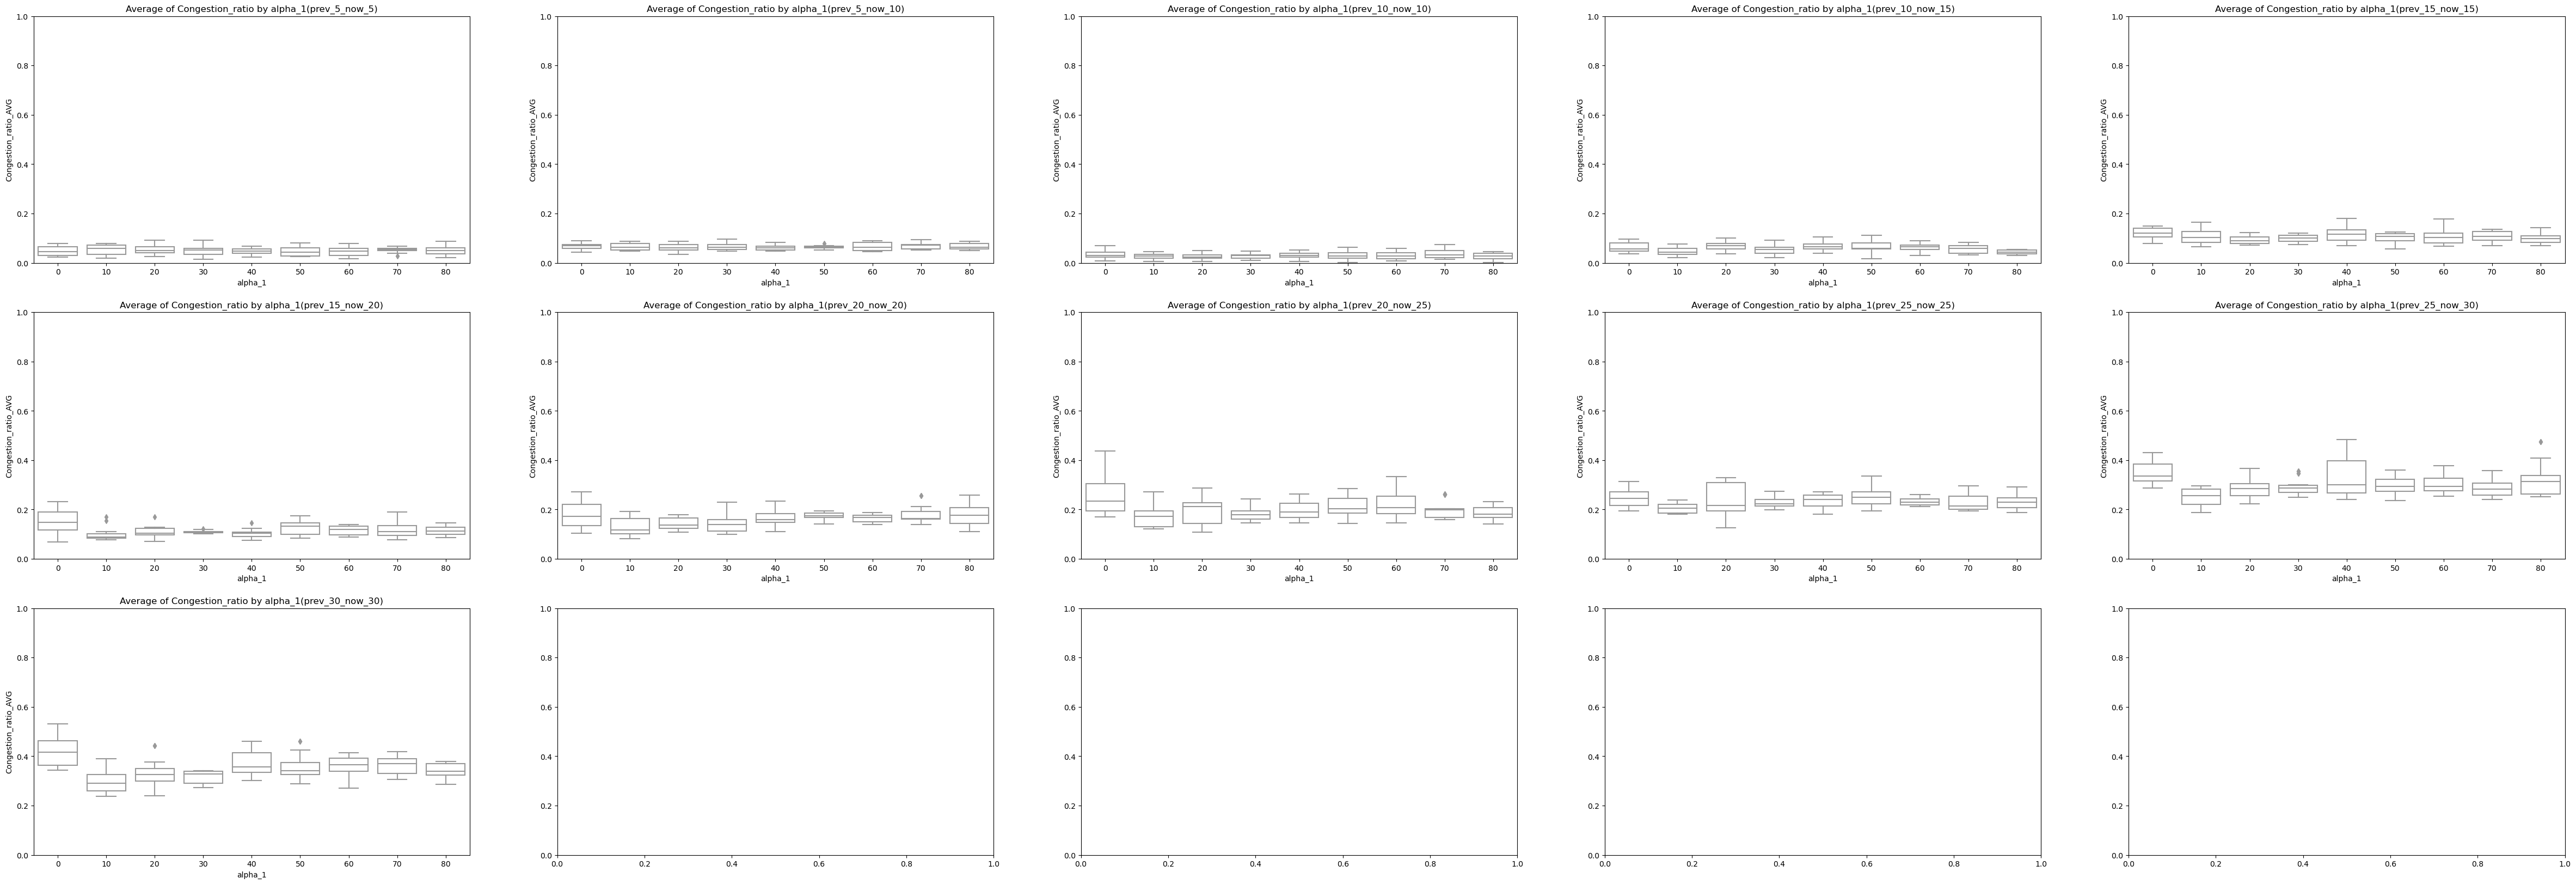

In [17]:
standard_outlier = 'Congestion_ratio_AVG'
nooutliers_dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier)
nooutliers_dfs = f.to_numeric(nooutliers_dfs, y_col[0])
    
f.boxsubplot(nooutliers_dfs , x_col, y_col[0], col_num, y_lim, title, fig_size)

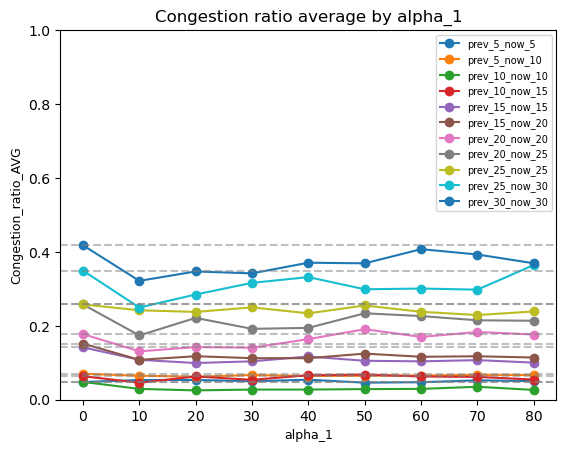

In [18]:
title = 'Congestion ratio average by alpha_1'
f.lineplot(dfs, x_col, y_col[0], y_lim, title)

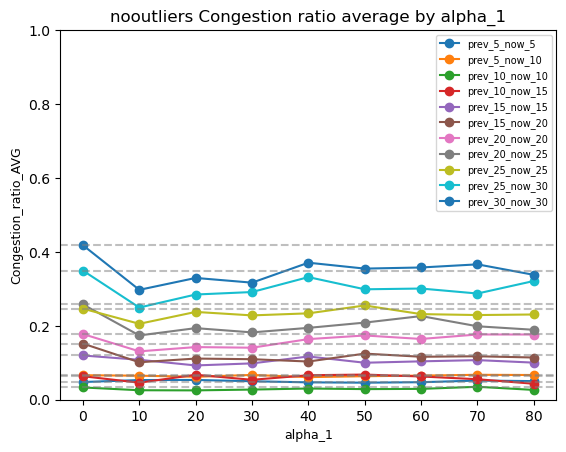

In [19]:
title = 'nooutliers Congestion ratio average by alpha_1'
f.lineplot(nooutliers_dfs, x_col, y_col[0], y_lim, title)

Remove outliers by  Congestion_ratio_AVG_prev !


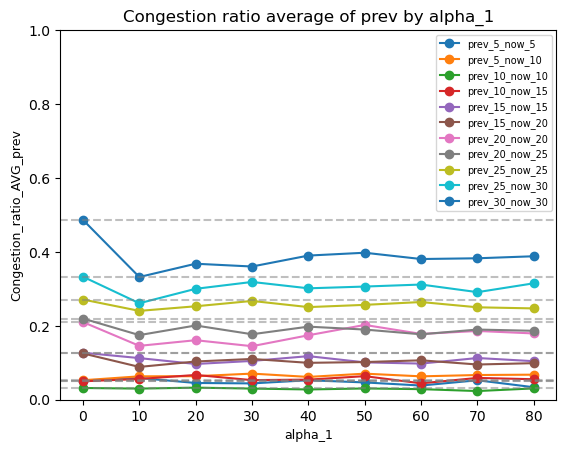

In [20]:
x_col = 'alpha_1'
y_col = ['Congestion_ratio_AVG_prev']

prev_dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier= 'Congestion_ratio_AVG_prev')
prev_dfs = f.to_numeric(prev_dfs, y_col[0])
    
title = 'Congestion ratio average of prev by alpha_1'

f.lineplot(prev_dfs, x_col, y_col[0], y_lim, title)

Remove outliers by  Congestion_ratio_AVG_now !


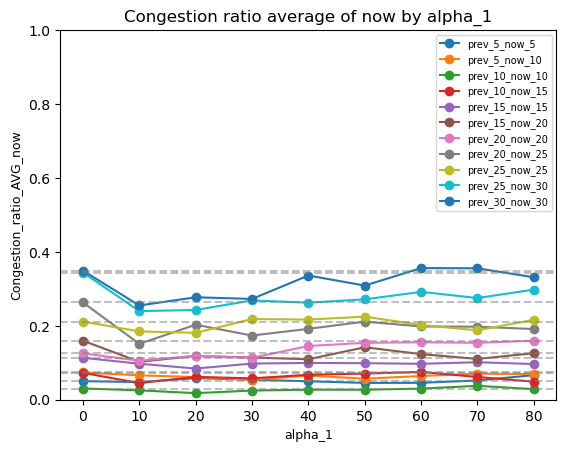

In [21]:
x_col = 'alpha_1'
y_col = ['Congestion_ratio_AVG_now']

now_dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
now_dfs = f.to_numeric(now_dfs, y_col[0])
title = 'Congestion ratio average of now by alpha_1'

f.lineplot(now_dfs, x_col, y_col[0], y_lim, title)

Remove outliers by  Congestion_ratio !
min :  -0.07936049 max :  0.1778055
min :  -0.06721275 max :  0.230277
min :  -0.08844566 max :  0.2019033
min :  -0.09546259 max :  0.2877404
min :  -0.09306592 max :  0.4225353
min :  -0.08636567 max :  0.5024509
min :  -0.08924523 max :  0.5516691
min :  -0.07814434 max :  0.6863599
min :  -0.06185265 max :  0.7803692
min :  -0.07635883 max :  0.9953355
min :  -0.07397099 max :  1.24012


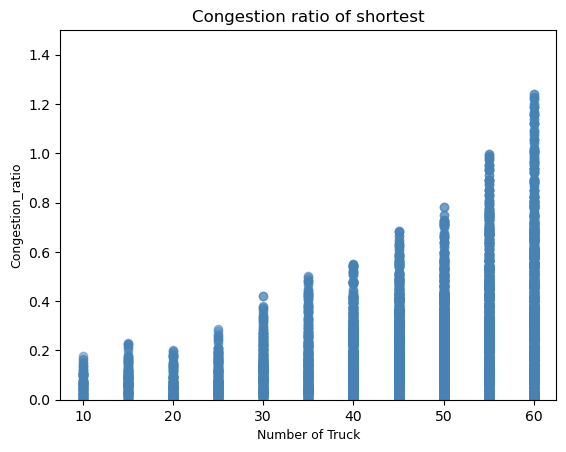

In [41]:
title = 'Congestion ratio of shortest'

x_col = ['Prev Truck Number', 'Now Truck Number']
x_label = 'Number of Truck'
y_col = ['Congestion_ratio']
y_lim = (0, 1.5)
legend_loc = 'upper left'

dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
dfs = f.to_numeric(dfs, y_col[0])
x_value = []
shortest_dfs = {}
# get new df where alpha_1 = 0
for key, value in dfs:

    # get value of where alpha_1 = 0
    shortest_df = value[value['alpha_1'] == 0]
    x_value.append(shortest_df[x_col].iloc[0].astype(int).sum())
    shortest_dfs[key] = shortest_df
    
    print('min : ', shortest_df[y_col[0]].min(), 'max : ', shortest_df[y_col[0]].max())
    
f.scatterplot(shortest_dfs, x_value, x_label, y_col[0], y_lim, title, 'steelblue', False, legend_loc)

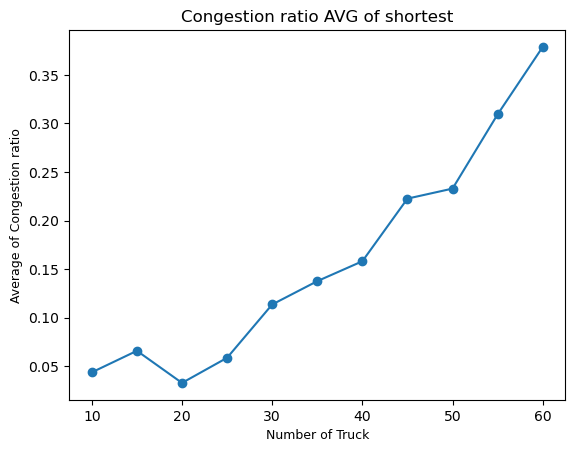

In [38]:

y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio'].mean())

# draw line plot
plt.plot(x_value, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Congestion ratio AVG of shortest')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()
        

In [ ]:
f.lineplot(shortest_dfs, x_col, y_col[0], y_lim, title)

Remove outliers by  Congestion_ratio !


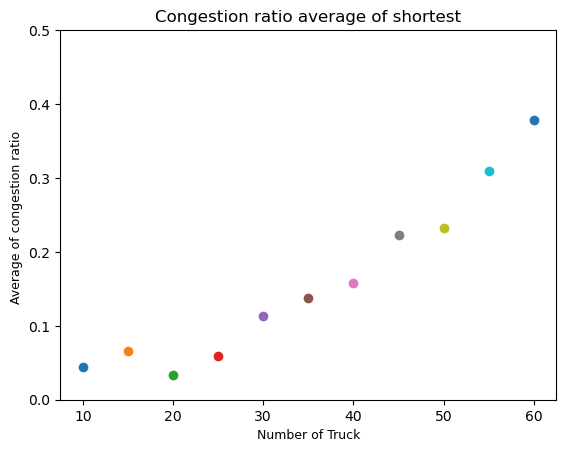

In [10]:


title = 'Congestion ratio average of shortest'

x_col = ['Prev Truck Number', 'Now Truck Number']
y_col = ['Congestion_ratio']
y_lim = (0, 0.5)

dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
dfs = f.to_numeric(dfs, y_col[0])
# get new df where alpha_1 = 0
for key, value in dfs:

    # get value of where alpha_1 = 0 and get average of y_col
    shortest_df = value[value['alpha_1'] == 0]
    
    x_value = shortest_df[x_col].iloc[0].astype(int).sum()
    y_value = shortest_df[y_col[0]].astype(float).mean()

    plt.scatter(x_value, y_value)

plt.ylim(y_lim)    
plt.title(title)
plt.xlabel('Number of Truck', fontsize = 9)
plt.ylabel('Average of congestion ratio ', fontsize = 9)

plt.show()

In [11]:
title = 'Congestion ratio average of LP'

x_col = ['Prev Truck Number', 'Now Truck Number']
y_col = ['Congestion_ratio']
y_lim = (0, 0.5)

dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
dfs = f.to_numeric(dfs, y_col[0])
print(dfs)

Remove outliers by  Congestion_ratio !
[('prev_5_now_5',      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
0                    5                5        0        0      100   
1                    5                5        0        0      100   
2                    5                5        0        0      100   
3                    5                5        0        0      100   
4                    5                5        0        0      100   
...                ...              ...      ...      ...      ...   
1050                 5                5       80       10       10   
1051                 5                5       80       10       10   
1052                 5                5       80       10       10   
1053                 5                5       80       10       10   
1054                 5                5       80       10       10   

      repeat_num  Congestion_ratio  
0              1         -0.030833  
1              1         -0.

Remove outliers by  C_max_prev !


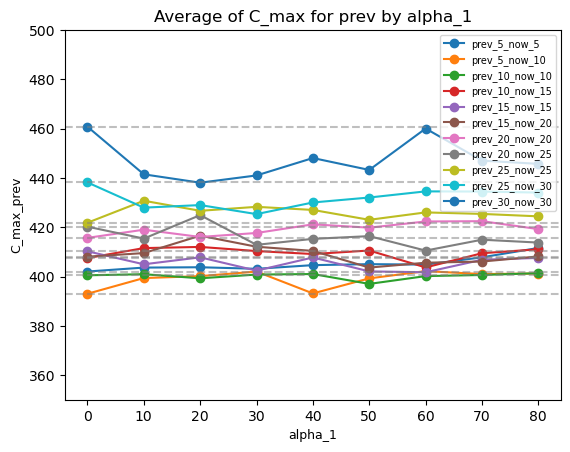

In [11]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = ['C_max_prev']
title = 'Average of C_max for prev by alpha_1'

y_lim = (350, 500)

c_max_prev_dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
c_max_prev_dfs = f.to_numeric(c_max_prev_dfs, y_col[0])
f.lineplot(c_max_prev_dfs, x_col, y_col[0], y_lim, title)

Remove outliers by  C_max_now !


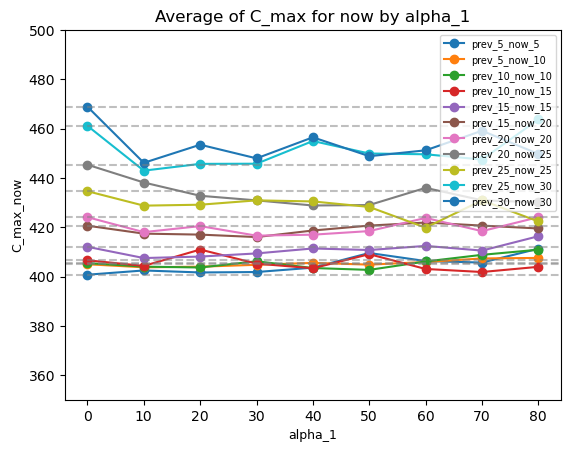

In [12]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = ['C_max_now']
title = 'Average of C_max for now by alpha_1'

y_lim = (350, 500)

c_max_now_dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
c_max_now_dfs = f.to_numeric(c_max_now_dfs, y_col[0])
f.lineplot(c_max_now_dfs, x_col, y_col[0], y_lim, title)

Remove outliers by  C_max !


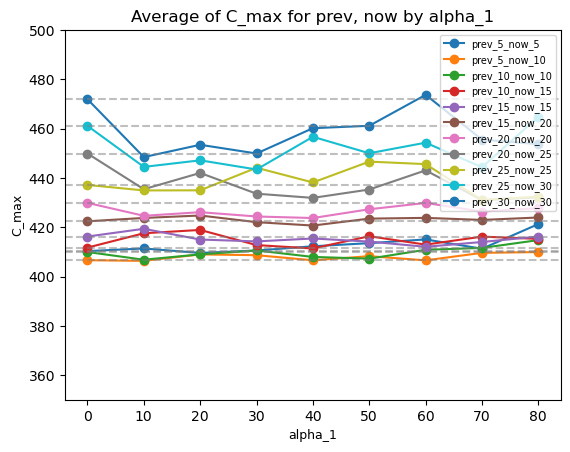

In [13]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = ['C_max']
title = 'Average of C_max for prev, now by alpha_1'

y_lim = (350, 500)

c_max_dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
c_max_dfs = f.to_numeric(c_max_dfs, y_col[0])
f.lineplot(c_max_dfs, x_col, y_col[0], y_lim, title)

Remove outliers by  Congestion_ratio !


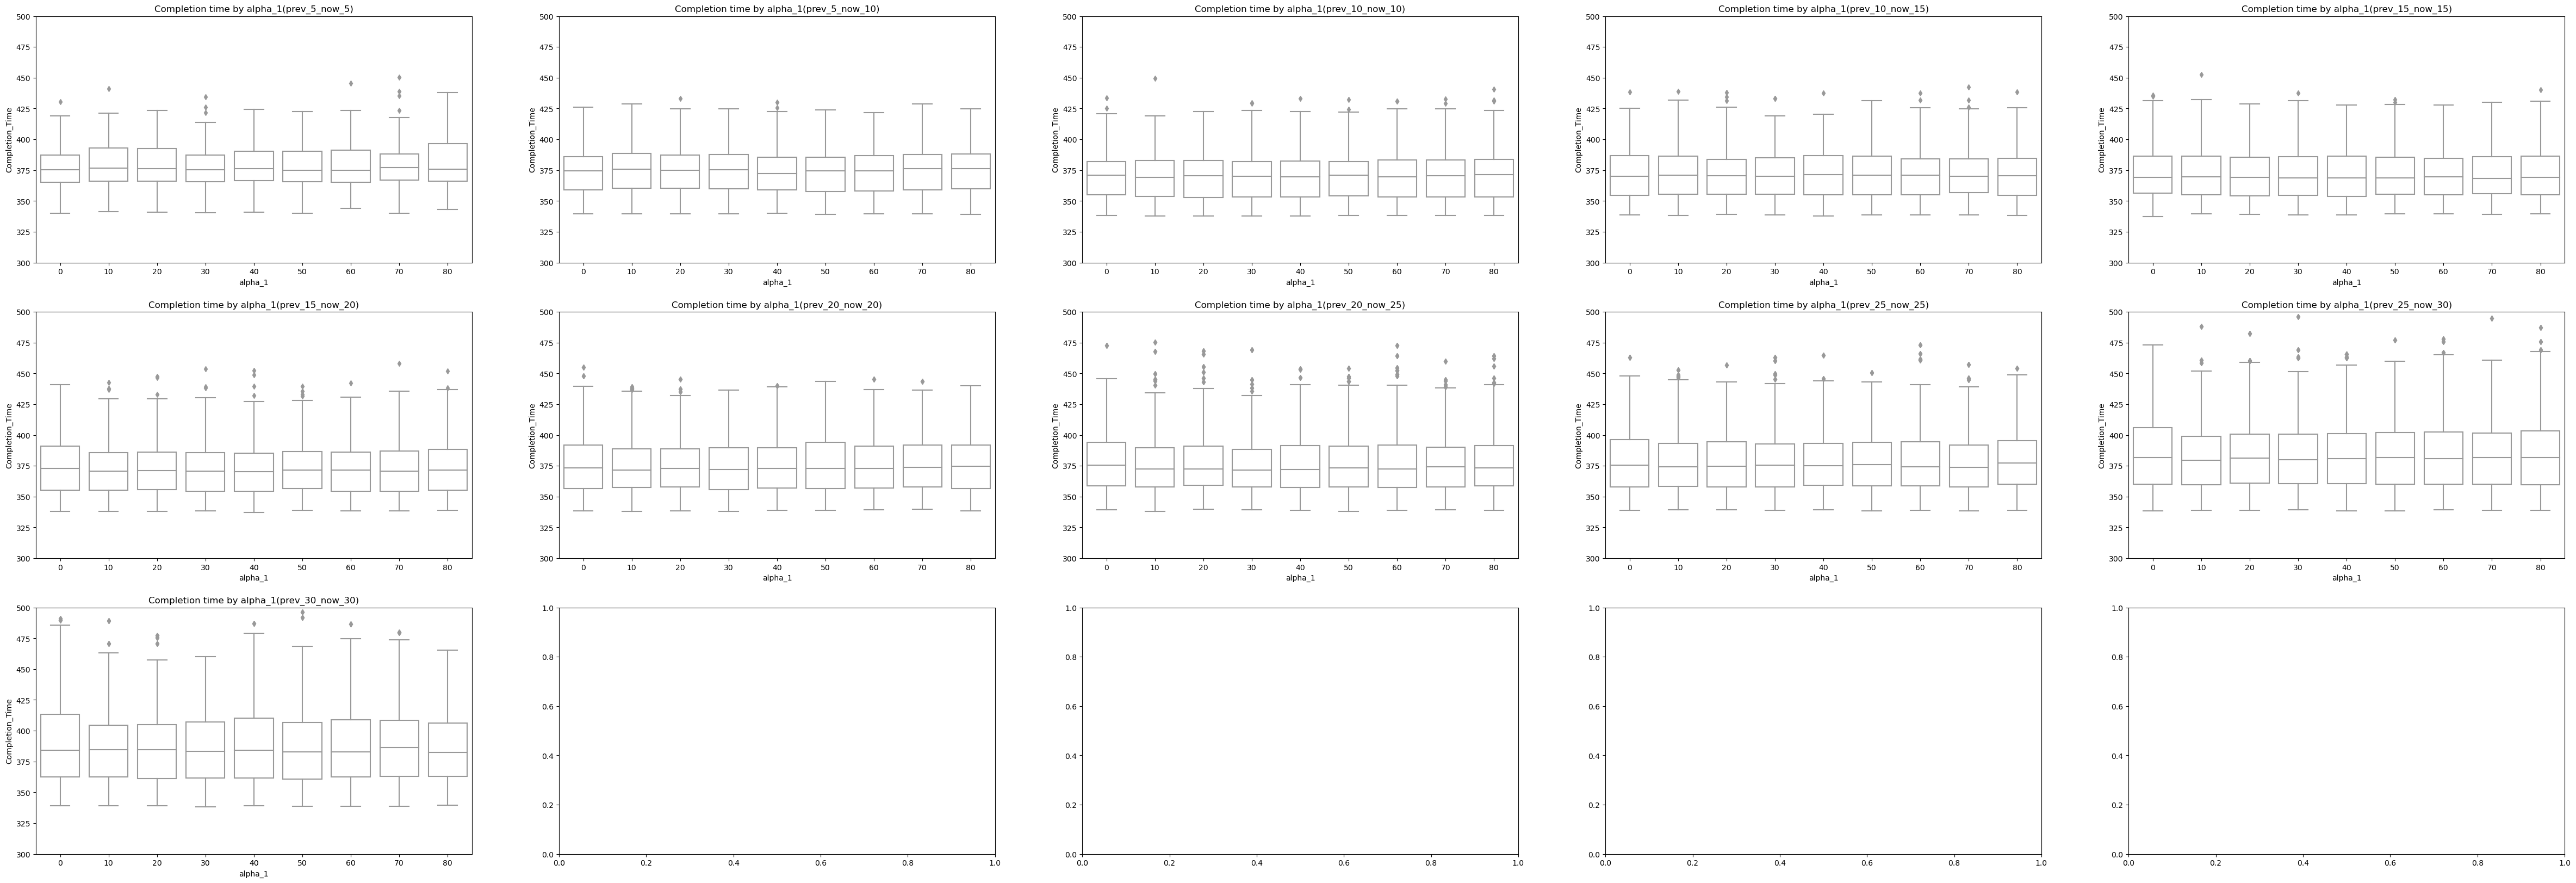

In [14]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = ['Congestion_ratio', 'Completion_Time']
col_num = 5
y_lim = (300, 500)
fig_size = (60, 20)
title = 'Completion time by alpha_1'

remove_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[0])
remove_df = f.to_numeric(remove_df, y_col[1])
f.boxsubplot(remove_df, x_col, y_col[1], col_num, y_lim, title, fig_size)

### Travel Time by Distance

Remove outliers by  Congestion_ratio !


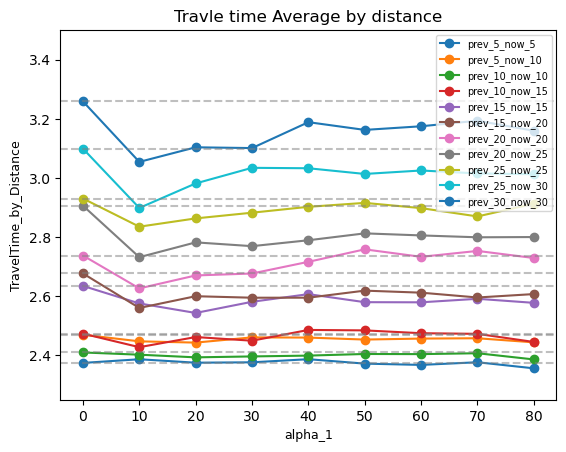

In [15]:
folder_path = 'Results'
x_col = 'alpha_1'
y_col = ['Congestion_ratio', 'TravelTime_by_Distance']
col_num = 5
y_lim = (2.25, 3.5)

title = 'Travle time Average by distance'

travel_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[0])
travel_df = f.to_numeric(travel_df, y_col[1])
f.lineplot(travel_df, x_col, y_col[1], y_lim, title)

Remove outliers by  Congestion_ratio !


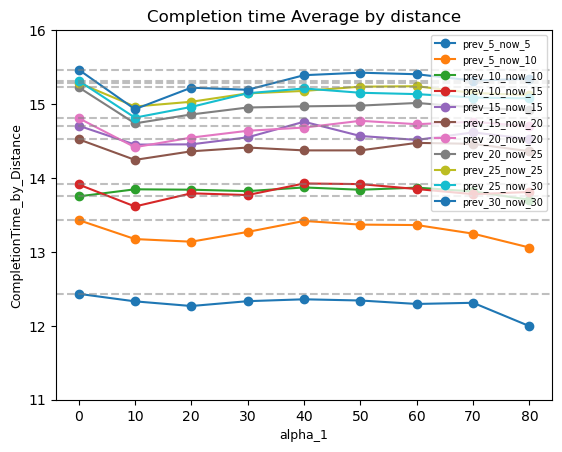

In [16]:
folder_path = 'Results'
x_col = 'alpha_1'
y_col = ['Congestion_ratio', 'CompletionTime_by_Distance']
col_num = 5
y_lim = (11, 16)

title = 'Completion time Average by distance'

completion_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[0])
completion_df = f.to_numeric(completion_df, y_col[1])
f.lineplot(completion_df, x_col, y_col[1], y_lim, title)

In [33]:
folder_path = 'Results'
x_col = 'Truck_id'
y_col = ['Truck_id', 'Congestion_ratio' , 'Completion_Time']
col_num = 5
y_lim = (300, 500)

title = 'Completion time by Truck_id'
c_dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[1])
c_dfs = f.to_numeric(c_dfs, y_col[2])

evaluateion = {}

for key, value in c_dfs:
    # group by alpha_1
    grouped_value = value.groupby('alpha_1')[y_col[2]].describe()
    print(grouped_value)

     
    # f.boxsubplot(value, x_col, y_col[2], col_num, y_lim, title, fig_size)

Remove outliers by  Congestion_ratio !
         count        mean        std      min      25%      50%      75%  \
alpha_1                                                                     
0        117.0  376.427077  18.587652  339.992  365.360  375.464  387.232   
10       119.0  378.221714  19.837165  341.272  366.192  376.488  392.968   
20       117.0  378.009709  18.945194  340.808  366.040  376.184  392.408   
30       117.0  377.472752  19.234157  340.312  365.440  375.296  387.072   
40       118.0  377.966305  19.366659  340.704  366.558  376.296  390.192   
50       119.0  377.801681  20.288702  340.000  365.784  374.824  390.372   
60       118.0  377.937898  20.561632  344.056  365.254  374.676  391.180   
70       116.0  378.564897  21.168277  340.016  366.844  376.948  387.974   
80       114.0  380.502526  22.179910  342.952  366.064  375.904  396.344   

             max  
alpha_1           
0        430.392  
10       441.224  
20       423.352  
30       434.248  

### example of Completion time 

In [26]:
# folder_path = 'Results'
# x_col = 'alpha_1'
# y_col = ['Truck_id', 'Congestion_ratio' , 'Completion_Time']
# col_num = 5
# y_lim = (300, 500)

# title = 'Completion time by distance'

# c_dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[1])

# new_dfs = {}

# # completion_time_max = {}
# # completion_time_min = {}
# # congestion_ratio_avg = {}

# for folder_name, df in c_dfs:
#     now_df = df[df['repeat_num'] == 1].copy()

#     now_df['Numeric_part'] = now_df['Truck_id'].str.extract('(\d+)').astype(float)
    
#     # Divide values based on the condition using .loc
#     print(now_df.loc[now_df['Numeric_part'] < 100])
#     # now_df.loc[now_df['Numeric_part'] >= 100]
        
   
    

Remove outliers by  Congestion_ratio !
    Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
0                   5                5        0        0      100           1   
1                   5                5        0        0      100           1   
2                   5                5        0        0      100           1   
3                   5                5        0        0      100           1   
4                   5                5        0        0      100           1   
117                 5                5       10       80       10           1   
118                 5                5       10       80       10           1   
119                 5                5       10       80       10           1   
120                 5                5       10       80       10           1   
236                 5                5       20       70       10           1   
237                 5                5       20       70       10     